In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_36047_Z')

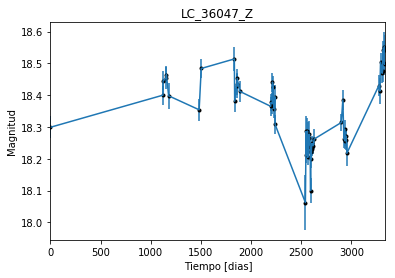

In [2]:
data = np.genfromtxt('LC_36047_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_36047_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

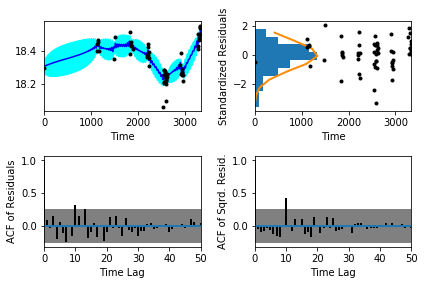

In [5]:
sample.assess_fit()

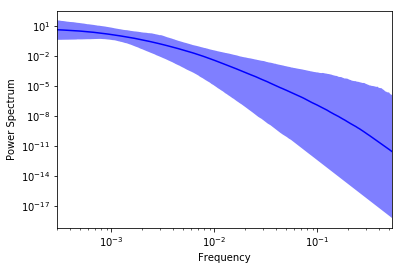

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_36047_Z')

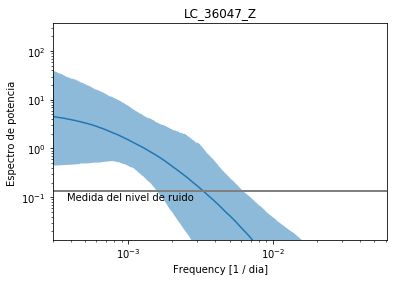

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_36047_Z')

Text(0.5,1,'Prediccion , valor esperado LC_36047_Z')

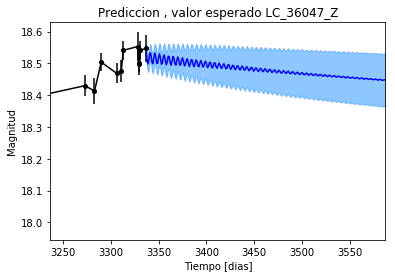

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_36047_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_36047_Z')

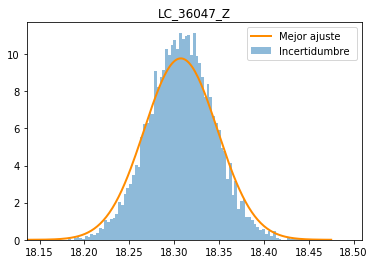

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_36047_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_36047_Z')

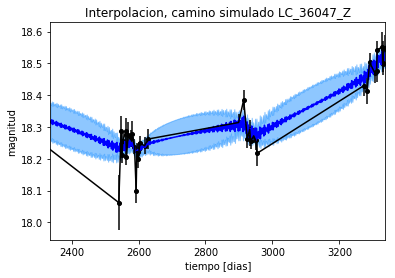

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_36047_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_36047_Z')

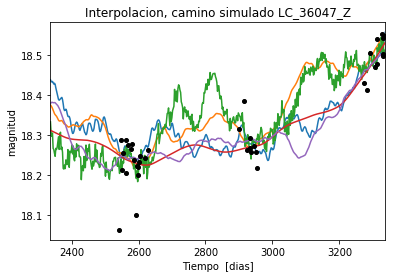

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_36047_Z')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 420.021212078
Median: 0.00877884701969
Standard deviation: 0.20910147299
68% credibility interval: [ 0.00087358  0.17578435]
95% credibility interval: [  3.46215735e-04   8.51203071e-01]
99% credibility interval: [  3.11713777e-04   9.99441123e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 845.636809132
Median: 0.00214137502654
Standard deviation: 0.0861021452245
68% credibility interval: [ 0.00051105  0.02732514]
95% credibility interval: [ 0.00032506  0.25729305]
99% credibility interval: [  3.04948078e-04   5.96741356e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 406.694364027
Median: 0.0226508451028
Standard 

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1237.64199877
Median: 118.717210268
Standard deviation: 1.5647045039
68% credibility interval: [ 116.93073323  119.81454013]
95% credibility interval: [ 114.52555752  120.40187271]
99% credibility interval: [ 112.49754534  120.71857235]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 323.204588578
Median: 0.620472157591
Standard deviation: 2.29706523994
68% credibility interval: [ 0.05755109  4.14517815]
95% credibility interval: [ 0.01450654  7.68798456]
99% credibility interval: [  1.04495601e-02   1.08314484e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 802.517358732
Median: 0.61252625551
Standard deviation: 9.15950577541
68% credibility interval: [ 0.02232157  9.25638614]
95% credibility interval: [  1.01

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 750.006788622
Median: 1.42159818243e-30
Standard deviation: 8.11112970216e+41
68% credibility interval: [  2.26079219e-119   2.17101897e-011]
95% credibility interval: [  4.35797353e-181   2.53198190e+004]
99% credibility interval: [  1.50357753e-195   1.86063503e+022]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3536.79170113
Median: 18.3741450344
Standard deviation: 0.0586821654467
68% credibility interval: [ 18.33074168  18.42308953]
95% credibility interval: [ 18.26829322  18.49897996]
99% credibility interval: [ 18.19611746  18.59038017]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1191.61275125
Median: 0.0126239671307
Standard deviation: 0.250834049424
68% credibility interval: [ 0.          0.37843986]
95% credibility interval: [ 0.          0.90086578]
99% credibility interval: [ 0.          1.03463106]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1191.61275125
Median: 0.0126239671307
Standard deviation: 0.250834049424
68% credibility interval: [ 0.          0.37843986]
95% credibility interval: [ 0.          0.90086578]
99% credibility interval: [ 0.          1.03463106]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 707.276241969
Median: 0.0
Standard deviation: 0.00067006594301
68% cre

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1237.64199877
Median: 118.717210268
Standard deviation: 1.5647045039
68% credibility interval: [ 116.93073323  119.81454013]
95% credibility interval: [ 114.52555752  120.40187271]
99% credibility interval: [ 112.49754534  120.71857235]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2084.0417486
Median: 0.0111711141209
Standard deviation: 0.0185466377319
68% credibility interval: [ 0.00655679  0.02246579]
95% credibility interval: [ 0.00411802  0.06083748]
99% credibility interval: [ 0.00338544  0.10781333]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1645.61120589
Median: 1.26499572001
Standard deviation: 0.196580960013
68% credibility interval: [ 1.08440607  1.46892328]
95% credibility interval: [ 0.92331123  1.71503634]
99% credibility interval: [ 0.84466813  1.87071818]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 912.13055087
Median: 0.00017383657745
Standard deviation: 0.066413434566
68% credibility interval: [  2.33259294e-06   6.08239197e-03]
95% credibility interval: [  6.68478927e-10   1.25943631e-01]
99% credibility interval: [  4.28694061e-27   4.51687783e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 420.021212078
Median: (-0.0551591226081-1.8399518632j)
Standard deviation: 2.05183423056
68% credibility interval: [-1.10448562-0.98136295j -0.00548884-0.01305075j]
95% credibility interval: [ -5.34826663e+00+0.j          -2.17533762e-03-6.22970962j]
99% credibility interval: [ -6.27967378e+00+0.j          -1.95855542e-03-1.88115504j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 845.636809132
Median: (-0.0134546561039+0.336753668309j)
Standard deviation: 1.66630382064
68% credibility interval: [-0.17168892+0.j -0.00321102+0.j]
95% credibility interval: [-1.61661992+0.80974168j -0.00204241+0.98834366j]
99% credibility interval: [ -3.74943652e+00+2.91821583j  -1.91604528e-03+0.j        ]
Posterior summary for paramete